# Task 2 - Prediction using Unsupervised ML

**By: Yashveer Singh Sohi** <br>
Data Science and Business Analytics Intern at The Sparks Foundation

## Problem Description

- From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
- Dataset : https://bit.ly/3kXTdox

## Importing required packages

In this notebook:
- [pandas](https://pandas.pydata.org/docs/) and [numpy](https://numpy.org/doc/) are used for data manipulation.
- [matplotlib.pyplot](https://matplotlib.org/3.3.3/contents.html) and [seaborn](https://seaborn.pydata.org/) are used for plotting and data visualization.
- [sklearn](https://scikit-learn.org/stable/) is used for building a K-Means Clusterring model for the data, and for evaluating the model.

In [1]:
# For Data Manipulation 
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For model building and evaluation
from sklearn.cluster import KMeans

## Reading the data

- Using pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method, the data is loaded into a pandas **dataframe** from the file in the URL mentioned above.

In [4]:
# File Path for the dataset
data_path = "/content/Iris.csv"

# Loading Data into a pandas dataframe
data = pd.read_csv(data_path)

# Show first 5 rows of the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Checking for Null Values

- [isnull](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) function is used to detect missing values for an array-like object.
- If a value is missing, it is set to **True** in the array returned by **isnull** function.
- Since, **True** is equivalant to 1, and **False** is equivalant to 0, the **sum** function will return the number of missing values for each column in the dataframe.

In [5]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Observations:** Clearly the data does not contain any missing values.

## Data Visualization

### Scatter Plots

In this section, scatter plots are built for each pair of the following columns: `SepalLengthCm`, `SepalWidthCm`, `PetalLengthCm`, `PetalWidthCm`.

- The [subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function in matplotlib is used to set the number of subplots, and the size of the figure.
- The scatter plot is built using [scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) function in matplotlib.pyplot.
- The [set_title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_title.html), [set_xlabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html) and [set_ylabel](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html) functions are used to set the Title, and axis labels for each subplot.
- The legends are displayed in the plots using the [legend](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.legend.html) function. 
- To display the figure [show](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) function is used.

In [9]:
data["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

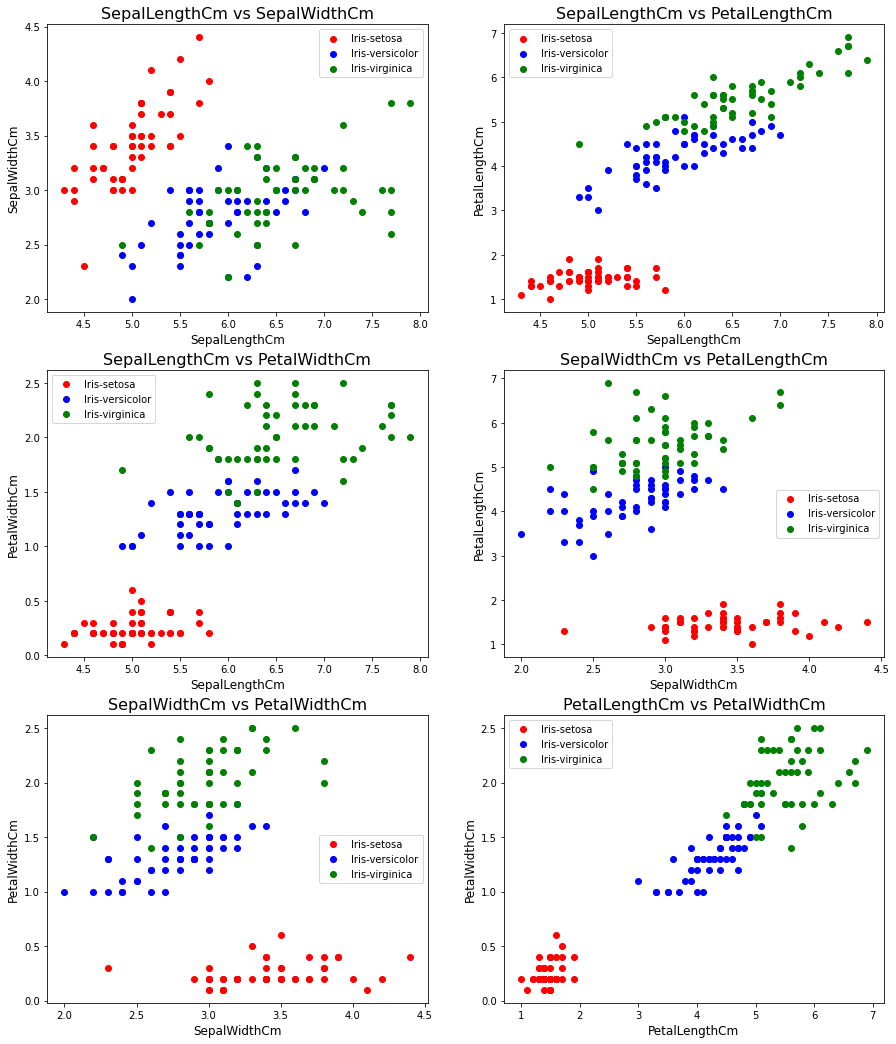

In [15]:
# Helper function to plot scatter plots
def plot_scatter_plots(df, x, y, ax):
  # Plot Iris-setosa points
  ax.scatter(df[df["Species"] == "Iris-setosa"][x], 
             df[df["Species"] == "Iris-setosa"][y], 
             color = "red", label = "Iris-setosa")

  # Plot Iris-versicolor points
  ax.scatter(df[df["Species"] == "Iris-versicolor"][x], 
             df[df["Species"] == "Iris-versicolor"][y], 
             color = "blue", label = "Iris-versicolor")

  # Plot Iris-virginica points
  ax.scatter(df[df["Species"] == "Iris-virginica"][x], 
             df[df["Species"] == "Iris-virginica"][y], 
             color = "green", label = "Iris-virginica")

  # Setting Title and axis labels
  ax.set_title(x + " vs " + y, size = 16)
  ax.set_xlabel(x, size = 12)
  ax.set_ylabel(y, size = 12)

  # Showing Legends
  ax.legend()


# Setting number of subplots and size of figure
fig, ax = plt.subplots(3, 2, figsize = (15, 18))

# Plotting Pair-wise scatter plots  
plot_scatter_plots(data, "SepalLengthCm", "SepalWidthCm", ax[0, 0])
plot_scatter_plots(data, "SepalLengthCm", "PetalLengthCm", ax[0, 1])
plot_scatter_plots(data, "SepalLengthCm", "PetalWidthCm", ax[1, 0])
plot_scatter_plots(data, "SepalWidthCm", "PetalLengthCm", ax[1, 1])
plot_scatter_plots(data, "SepalWidthCm", "PetalWidthCm", ax[2, 0])
plot_scatter_plots(data, "PetalLengthCm", "PetalWidthCm", ax[2, 1])

# Displaying Plots
plt.show()